In [66]:
from treecalculator import TreeCalculator
from treemodel import TreeModel
import pickle
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ada_model = pickle.load(open('TrainedModelManualZoom16.p', 'rb'))
images = pickle.load(open('images-lausanne-zoom-16.p', 'rb'))['sat']

tree_model = TreeModel(ada_model)


tree_calculator = TreeCalculator(tree_model)

In [55]:
%%time

print('Nr of images at zoom level 16 of Lausanne = {}'.format(len(images)))
percentage = tree_calculator.calculate_from_images(images[:10])
print('Percentage of trees in Lausanne City = {:6.4f}%'.format(percentage * 100))

Nr of images at zoom level 16 of Lausanne = 702


C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: divide by zero encountered in log
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: invalid value encountered in subtract
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: divide by zero encountered in log
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: invalid value encountered in subtract
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))


Percentage of trees in Lausanne City = 9.8800%
Wall time: 1min 10s


In [37]:
def exponent_range(max_e, num):
    out = []
    for e in range(1, num+1):
        out.append(int(10**(e*max_e/num)))
    return np.array(out)

C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: divide by zero encountered in log
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:29: RuntimeWarning: invalid value encountered in subtract
  alpha * np.log(img[:, :, 2] / float(255)) -
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: divide by zero encountered in log
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\Users\serge\Documents\EPFL\Personal Interaction Studio\Code\treemodel.py:30: RuntimeWarning: invalid value encountered in subtract
  (1 - alpha) * np.log(img[:, :, 0] / float(255)))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


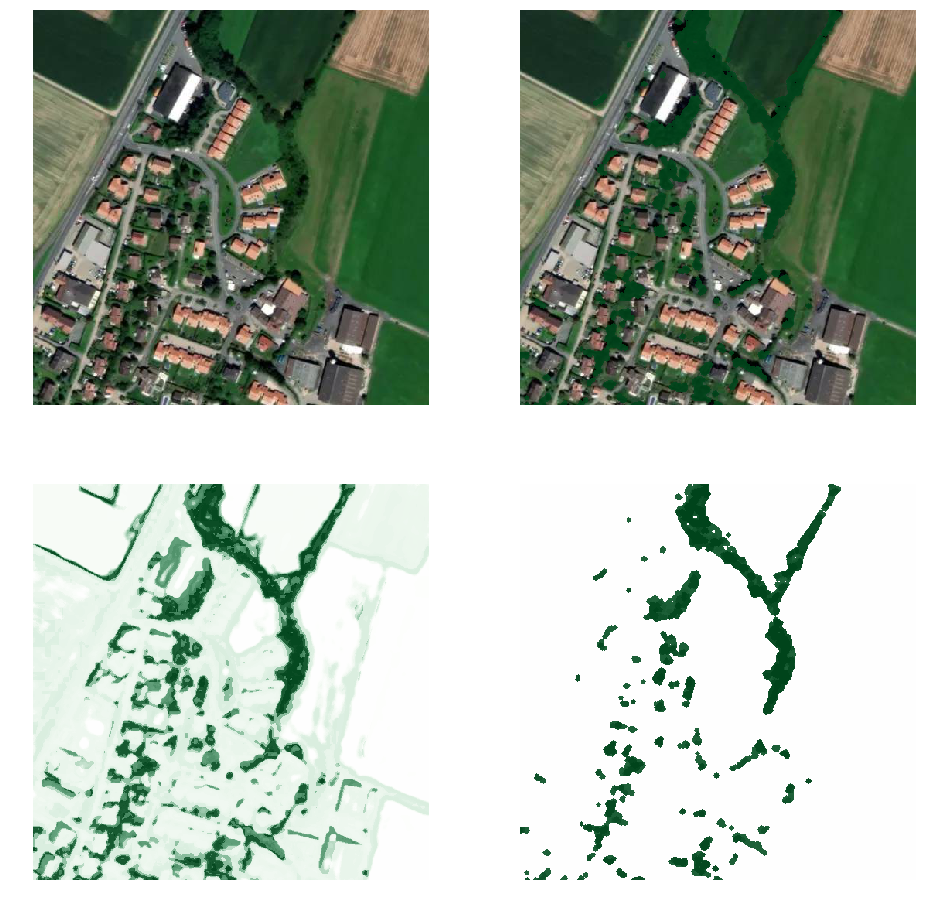

In [72]:
from matplotlib.colors import ListedColormap
import numpy as np
from pylab import rcParams
pylab.rcParams['figure.figsize'] = (16, 16)

img = images[6]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

ax1.imshow(img)

im1 = ax2.imshow(img)

cmap = plt.cm.Greens
my_cmap = cmap(np.arange(cmap.N))
# my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap[:,-1] = exponent_range(2, cmap.N) / 100
my_cmap = ListedColormap(my_cmap)

predicted_img = tree_model.predict_proba(img)
overlay_img = tree_calculator.filter_image(predicted_img)
overlay_img = tree_calculator.threshold_image(overlay_img, threshold=0.5, mode=cv2.THRESH_TOZERO)
im2 = ax2.imshow(overlay_img, cmap=my_cmap, alpha=0.9)
ax3.imshow(predicted_img, cmap=my_cmap)
ax4.imshow(overlay_img, cmap=my_cmap)